In [22]:
import torch
import clip
from PIL import Image
import os
import os.path as osp
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

In [114]:
def find_text_match(image, text_list):
    # given an image and a list of possible text matchs, find the best match
    image = preprocess(Image.open(image)).unsqueeze(0).to(device)
    text = clip.tokenize(text_list).to(device)

    with torch.no_grad():

        logits_per_image, logits_per_text = model(image, text)
        probs = logits_per_image.softmax(dim=-1).cpu().numpy()

    res = dict(zip(text_list, probs[0] * 100))
    return res


def find_image_match(text, image_list):
    # give a text and a list of possible image matchs, find the best match
    images = [preprocess(Image.open(img)).unsqueeze(0) for img in image_list]
    images = torch.cat(images).to(device)
    
    text = clip.tokenize([text]).to(device)
    
    with torch.no_grad():

        logits_per_image, logits_per_text = model(images, text)
        probs = logits_per_text.softmax(dim=-1).cpu().numpy()

    res = dict(zip(image_list, probs[0] * 100))
    return res


def find_image_image_match(image, image_list):
    # give a text and a list of possible image matchs, find the best match
    images = [preprocess(Image.open(img)).unsqueeze(0) for img in image_list]
    images = torch.cat(images).to(device)
    
    image = torch.cat([preprocess(Image.open(image)).unsqueeze(0)]).to(device)
    
    with torch.no_grad():
        image_features = model.encode_image(images)
        image1_features = model.encode_image(image)
        
        image_features /= image_features.norm(dim=-1, keepdim=True)
        image1_features /= image1_features.norm(dim=-1, keepdim=True)
        similarity =  100 * image_features @ image1_features.T

    res = dict(zip(image_list, similarity.reshape(-1).tolist()))
    return res

In [84]:
def get_label(file):
    return " ".join(file.split("\\")[1].split(".")[0].split("_"))

In [94]:
base = "test_images"
image_list = []
for image in os.listdir(base):
    image_list.append(osp.join(base, image))
    
text_list = [get_label(file) for file in image_list]

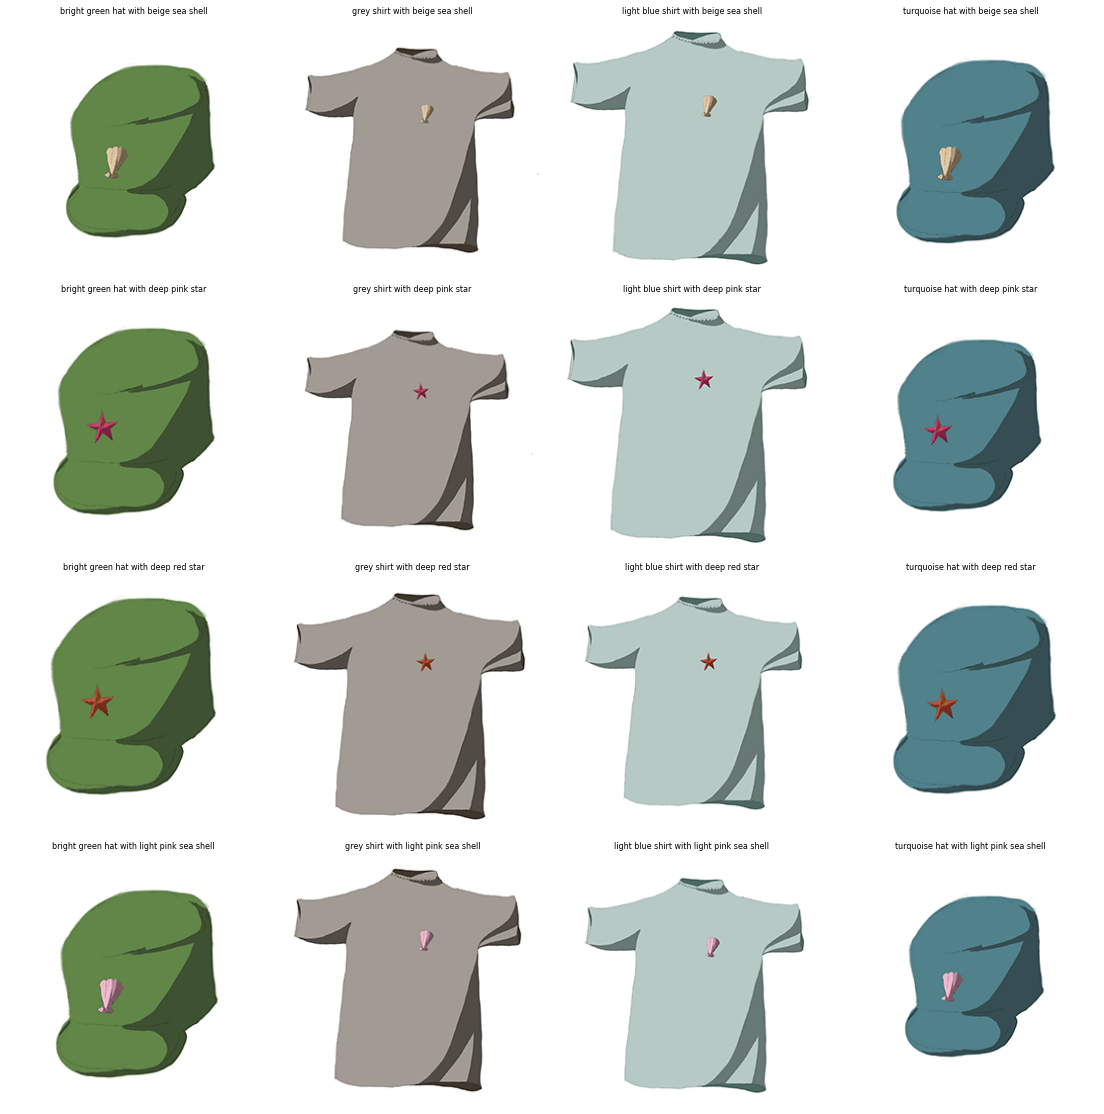

In [115]:
fig, ax = plt.subplots(4, 4)

fig.set_figheight(20)
fig.set_figwidth(20)

for i, image in enumerate(image_list):
    k = i % 4
    m = i // 4
    img = mpimg.imread(image)
    ax[k][m].imshow(img)
    ax[k][m].axis('off')
    ax[k][m].set_title(get_label(image), fontsize=8)
    
plt.subplots_adjust(wspace=0, hspace=0.1)

In [116]:
idx = 10
res = find_text_match(image_list[idx], text_list)
print(image_list[idx])
res

test_images\light_blue_shirt_with_deep_red_star.png


{'bright green hat with beige sea shell': 3.0720884e-07,
 'bright green hat with deep pink star': 1.7562304e-05,
 'bright green hat with deep red star': 0.00015113493,
 'bright green hat with light pink sea shell': 2.0849168e-07,
 'grey shirt with beige sea shell': 0.022179112,
 'grey shirt with deep pink star': 4.310208,
 'grey shirt with deep red star': 69.996315,
 'grey shirt with light pink sea shell': 0.015379411,
 'light blue shirt with beige sea shell': 0.007403766,
 'light blue shirt with deep pink star': 3.7267885,
 'light blue shirt with deep red star': 21.907503,
 'light blue shirt with light pink sea shell': 0.009505572,
 'turquoise hat with beige sea shell': 4.7784824e-06,
 'turquoise hat with deep pink star': 0.00042377782,
 'turquoise hat with deep red star': 0.004120824,
 'turquoise hat with light pink sea shell': 1.9803679e-06}

In [117]:
idx = 1
res = find_text_match(image_list[idx], text_list)
print(image_list[idx])
res

test_images\bright_green_hat_with_deep_pink_star.png


{'bright green hat with beige sea shell': 0.20544691,
 'bright green hat with deep pink star': 40.50839,
 'bright green hat with deep red star': 58.401768,
 'bright green hat with light pink sea shell': 0.66152817,
 'grey shirt with beige sea shell': 7.5768335e-06,
 'grey shirt with deep pink star': 0.010327992,
 'grey shirt with deep red star': 0.013429632,
 'grey shirt with light pink sea shell': 2.5717993e-05,
 'light blue shirt with beige sea shell': 2.610344e-07,
 'light blue shirt with deep pink star': 0.001288987,
 'light blue shirt with deep red star': 0.00049630273,
 'light blue shirt with light pink sea shell': 5.6615095e-06,
 'turquoise hat with beige sea shell': 8.845069e-05,
 'turquoise hat with deep pink star': 0.092711225,
 'turquoise hat with deep red star': 0.104136884,
 'turquoise hat with light pink sea shell': 0.0003594151}